### Fourier Transform 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz
from numpy import fft 
import random
import os 



Bad key text.latex.unicode in file /Users/lab2020/opt/anaconda3/envs/learning/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file /Users/lab2020/opt/anaconda3/envs/learning/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key pgf.debug in file /Users/lab2020/opt/anaconda3/envs/learning/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 444 ('pgf.debug           : False')
You pr

signal and signal with noise

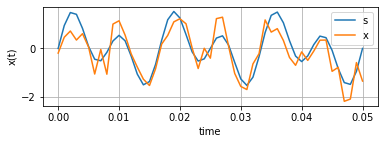

In [5]:
fmax = 1000  # sampling frequency 1000Hz
dt = 1/fmax
N = 1500

t = np.arange(0, N) * dt 
s = 0.7 * np.sin(2 * np.pi * 60 * t) + np.sin(2 * np.pi * 120 * t)
x = s + .5 * np.random.randn(N)

plt.subplot(2, 1, 1)
plt.plot(t[0:51], s[0:51], label='s')
plt.plot(t[0:51], x[0:51], label='x')
plt.legend()
plt.xlabel('time')
plt.ylabel('x(t)')
plt.grid()

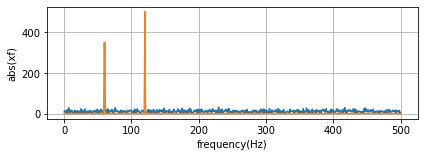

In [7]:
# Fourier spectrum 
df = fmax/N 
f = np.arange(0, N) * df 

sf = np.fft.fft(s) * df 
xf = np.fft.fft(x) * df 

plt.subplot(2, 1, 1) 
plt.plot(f[0:int(N/2 + 1)], np.abs(xf[0: int(N/2 + 1)]))
plt.plot(f[0:int(N/2 +1)], np.abs(sf[0:int(N/2 + 1)]))
plt.xlabel("frequency(Hz)"); plt.ylabel("abs(xf)"); plt.grid()
plt.tight_layout()

t = np.arange(0, N) * dt 
sr = np.fft.fft(sf) / df 
xr = np.fft.fft(xf) / df 
plt.subplot(2, 1, 2)
plt.plot()

In [9]:
import numpy as np
import matplotlib.pyplot as plt 

# Signal Properties 
N = 1024; T=10e-6; dt=T/N 
t = np.arange(0, T, dt)



(0.0, 9.990234375000001e-06)

In [10]:
delay_profile = {"power": [0.6, 0.4],
                 "time": [0, 3e-3]}


    


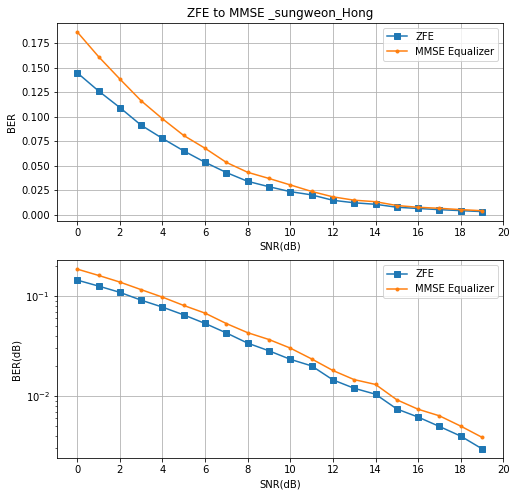

In [11]:
N = 10**5

ip = np.random.randint(0, 2, N) 
s = 2 * ip - 1 # BPSK modulation 

snr_db = np.arange(0, 20) 
simBER_zf = []
simBER_mmse = []
for snr in snr_db: 
    n = 1/np.sqrt(2) * (np.random.normal(0, 1, N) + 1j*np.random.normal(0, 1, N))
    h = 1/np.sqrt(2) * (np.random.normal(0, 1, N) + 1j*np.random.normal(0, 1, N))

    # channel and noise addition 
    y = h * s + 10**(-snr/20)*n 

    # zero forcing Equalization 
    yHat_zf = y / h 
    yHat_mmse = y / (h + .5 * 10 ** (-snr/20))

    ipHat_zf = [int(np.real(x)>0) for x in yHat_zf]
    ipHat_mmse = [int(np.real(x)>0) for x in yHat_mmse]

    simBER_zf.append(np.sum(ip!=ipHat_zf))
    simBER_mmse.append(np.sum(ip!=ipHat_mmse))

simBER_zf = np.array(simBER_zf) / N 
simBER_mmse = np.array(simBER_mmse) / N 

snr = 10 ** (snr_db/10)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.title("ZFE to MMSE _sungweon_Hong")
plt.plot(simBER_zf, 's-', label='ZFE')
plt.plot(simBER_mmse, '.-', label='MMSE Equalizer')
plt.legend()
plt.xlabel("SNR(dB)")
plt.ylabel("BER")
plt.xticks(range(0, 22, 2))
plt.grid()
plt.subplot(2, 1, 2)
plt.semilogy(simBER_zf, 's-', label='ZFE')
plt.semilogy(simBER_mmse, '.-', label="MMSE Equalizer")
plt.xticks(range(0, 22, 2)) 
plt.xlabel("SNR(dB)")
plt.ylabel("BER(dB)")
plt.legend()
plt.grid()
plt.show() 


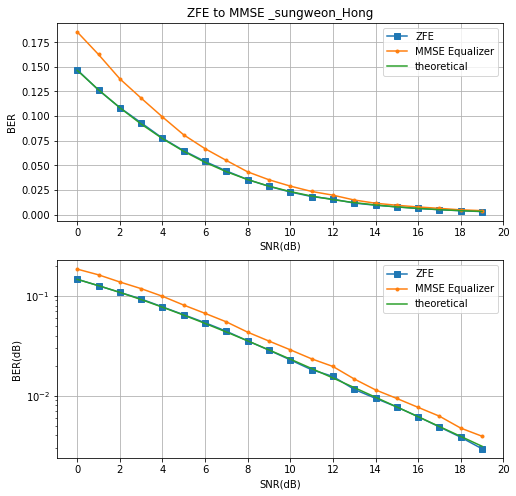

In [10]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.title("ZFE to MMSE _sungweon_Hong")
plt.plot(simBER_zf, 's-', label='ZFE')
plt.plot(simBER_mmse, '.-', label='MMSE Equalizer')
plt.legend()
plt.xlabel("SNR(dB)")
plt.ylabel("BER")
plt.xticks(range(0, 22, 2))
plt.grid()
plt.subplot(2, 1, 2)
plt.semilogy(simBER_zf, 's-', label='ZFE')
plt.semilogy(simBER_mmse, '.-', label="MMSE Equalizer")
plt.xticks(range(0, 22, 2)) 
plt.xlabel("SNR(dB)")
plt.ylabel("BER(dB)")
plt.legend()
plt.grid()
plt.show() 

In [153]:
n = [1/np.sqrt(2) * (np.random.normal(0, 1, N) + 1j*np.random.normal(0, 1, N)) for _ in range(len(snr_db))]
h = [1/np.sqrt(2) * (np.random.normal(0, 1, N) + 1j*np.random.normal(0, 1, N)) for _ in range(len(snr_db))]

y = [h[i] * s + 10**(-snr/10) * n[i] for i, snr in enumerate(snr_db)]
# y = [h * s for _ in snr_db]

yHat = [y[i] / h[i] for i, _ in enumerate(snr_db)]

ipHat = [(np.real(yHat[i]) > 1) * 1 for i, _ in enumerate(snr_db)]

BER = np.array([np.sum((ipHat[i] != ip[i])*1) for i, _ in enumerate(snr_db)])
BER = BER / N




In [184]:
N = 10 ** 5  # number of bits or symbols 
SNR = 10     
K = 2 

ip = np.random.randint(0, 2, N)
s = 2 * ip - 1 

nTap = 2
ht = [0.6, 0.4] 
l = len(ht) 

chanout = np.convolve(s, ht)
n = 1/np.sqrt(2) * (np.random.normal(0, 1, N + len(ht) - 1) + 1j * np.random.normal(0, 1, N + len(ht) - 1))

# noise addition 
y = chanout + 10 ^ (-SNR / 20) * n 



In [185]:
len(n)

100001

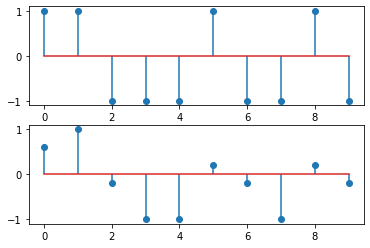

In [183]:
plt.figure()
plt.subplot(2, 1, 1)
plt.stem(s[0:10])
plt.subplot(2, 1, 2)
plt.stem(chanout[0:10])
plt.show()

In [ ]:
SNR = 10 
K = 4

# Transmitter 
ip = np.random.randint(0, 2, N) 
s = 2 * ip - 1 # BPSK Modulation 

# Channel model, multi path channel 
nTap = 2 
ht = np.array([0.6, 0.4])

chanOut = np.convolve(s, ht)
n = 1/np.sqrt(2) * (np.random.normal(0, 1, N+len(ht)-1 + 1j * np.random.normal(0, 1, N+len(ht)-1)))

# Noise addition 
y = chanOut + 10 ** (-SNR)

/Users/lab2020/opt/anaconda3/envs/learning/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


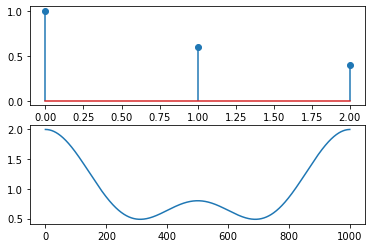

In [20]:
import numpy  as np
import matplotlib.pyplot as plt 
from numpy.fft import fft 

td = [1, 0.6, 0.4]
K = 1000

plt.figure()
plt.subplot(2, 1, 1)
plt.stem(td) 
plt.subplot(2, 1, 2)
plt.plot(fft(td, K))
plt.show()


In [67]:
N = 10**4

# Transmitter 
ip = np.random.rand(1, N) > 0.5
s = 2 * ip -1 
nRx = np.arange(0, 20) + 1
Eb_N0_dB = np.arange(0, 25) + 1

for rx in nRx:
    for snr in Eb_N0_dB:
        pass



In [59]:
def channel(symbols: np.array, snr, ntx=1, nrx=1):
    """Rayleigh Fading channel"""
    slen = len(symbols[0])
    n = 1/np.sqrt(2) * (np.random.randn(nrx, slen) + 1j * np.random.randn(nrx, slen))
    h = 1/np.sqrt(2) * (np.random.randn(nrx, slen) + 1j * np.random.randn(nrx, slen)) 

    # symbols with different channels (due to diversity)
    sym_diverse = np.kron(np.ones(shape=(nrx, 1)), symbols)
    r = h * sym_diverse + 10 ** (-snr/20) * n 
    
    return r 


In [58]:
len(ss[0])

10

In [75]:
y = channel(s, snr=10)
y

[[ 1.12289595-0.46046469j -0.30304529+0.2058502j   0.34091091+0.66388762j
  ... -0.14296739+0.08990634j -0.22639831+0.08028225j
   0.107806  -0.96003142j]]
[[ 0.06774475-0.63692131j  0.66276874+0.15265448j  0.14343361+0.56666369j
  ... -0.22365686-0.15726834j  0.72793707-0.27309751j
   0.71641531-0.98727815j]]


array([[ 0.42283563-0.78253303j,  0.5669374 +0.21775003j,
        -0.03562812-0.35672399j, ...,  0.17844661+0.18569922j,
         0.65634364-0.24771004j,  0.75050656-1.29086674j]])

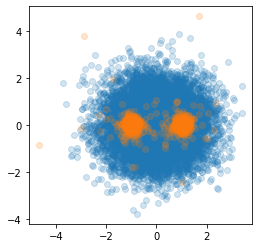

In [76]:
x = np.random.randn(1, 10**4) + 1j * np.random.randn(1, 10**4)
h = np.random.randn(1, 10**4) + 1j * np.random.randn(1, 10**4)
y = h*s + (10**(0)/20)*x 
y_hat = y/h 

plt.figure(figsize=(4, 4))
plt.scatter(np.real(y), np.imag(y), alpha=0.2)
plt.scatter(np.real(y_hat), np.imag(y_hat), alpha=0.2)

In [85]:
y = channel(s, snr=25)


[[ 0.92499612-0.29428609j -0.1518519 +0.15072912j  1.52459391-0.14238305j
  ...  0.38835686-0.21294092j -1.11975499-0.42193187j
  -0.50198064-0.30488166j]]
[[ 0.05410102-1.01355095j  1.66984496+0.1866299j   0.29986776+0.37302893j
  ...  0.37318013-0.57029165j -0.08440081-0.36130259j
  -0.37557162-0.40055394j]]


(-2.0, 2.0)

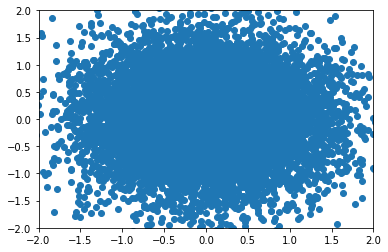

In [86]:
# y = y / h 
plt.scatter(np.real(y), np.imag(y))
plt.xlim([-2, 2]); plt.ylim([-2, 2])

[[ 0.37373733-1.50042394j -0.69742672-0.13558717j -1.22740101+0.14545775j
  ...  0.13166004-1.2913862j  -0.52043862+0.48780362j
  -0.82023044-0.04746442j]
 [-0.40787007-1.0516556j   0.16873084-0.537526j   -0.25937645-0.06578789j
  ... -0.43965926+0.44114025j -0.90334571-0.63989613j
  -0.50480158-0.02752371j]]
[[-0.7753671 +6.94098005e-01j -0.09718594+6.00354408e-04j
   0.01791353-1.07464246e-02j ... -0.28258756+1.75514290e+00j
  -0.87609448+2.60641348e-01j -0.76905227-8.35161007e-01j]
 [ 0.09123741-1.35706160e-01j  0.27989607+8.44185014e-01j
   0.26950563-1.65747824e+00j ...  0.44067414-1.90498125e-01j
  -0.12590094-1.58767156e-01j -1.58685566+2.26814898e+00j]]


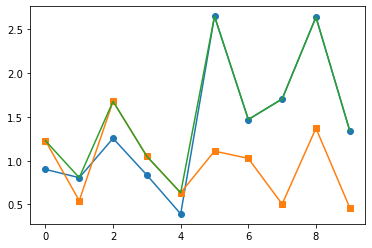

In [96]:
y = channel(s, snr=0, nrx=2)

plt.plot(np.abs(y)[0, :10], '-o')
plt.plot(np.abs(y)[1, :10], '-s')
plt.plot(np.max(np.abs(y), axis=0)[:10])

In [27]:
main()

TypeError: 'A' object is not callable